In [3]:
import pandas as pd

file_path = "/Users/anirudhravipudi/Desktop/Project (IPL)/IPL2020_Tweets.csv"
df = pd.read_csv(file_path)

df.head(5)

/var/folders/3z/j19155j53837tjkhyx5r2rt80000gn/T/ipykernel_70811/1476447154.py:4: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,month,year
0,GAURAV DHANAWAT 🇮🇳,"Delhi,India",Live EVS Operator/Coordinator | EX Ten Sports ...,02/04/09 17:06,147.0,127.0,205.0,False,2020-11-11,Time to change the Bubble from #IPL2020 to #IS...,"['IPL2020', 'ISL2020']",Twitter for iPhone,False,11.0,2020.0
1,🇮🇳🇮🇳 शुभम दोहरे 🇮🇳🇮🇳,"Bhopal, India",👉💯%Bhopali😎\n👉B+🔥\n👉Proud to be an #indian🇮🇳\n...,10/11/16 5:09,113.0,699.0,1412.0,False,2020-11-11,Why is #2020Fixing trending?? \n\nI think rcb ...,['2020Fixing'],Twitter for Android,False,11.0,2020.0
2,Steven Gordon,"Carrickfergus, Northern Irelan","Buns are good but puns are better, best served...",03/04/13 15:03,27.0,57.0,41.0,False,2020-11-11,@ICC And still #rajasthanroyals finished last...,"['rajasthanroyals', 'JofraArcher', 'RR', 'jofr...",Twitter for Android,False,11.0,2020.0
3,Bhumish Patel,Montreal Canada,"Student at Concordia University, Montreal, CA\...",04/07/13 16:24,131.0,1525.0,10343.0,False,2020-11-11,I still remember the bus parade after @mipalta...,NaN,Twitter Web App,False,11.0,2020.0
4,cricket22yards,NaN,We are a cricketing blog highly focusing on th...,02/09/16 19:14,551.0,189.0,160.0,False,2020-11-11,"#IPL2020 \n\nSTATS: Most runs, fastest fifties...",['IPL2020'],Twitter Web App,False,11.0,2020.0


In [5]:
import pandas as pd

# Load the dataset
file_path = "/Users/anirudhravipudi/Desktop/Project (IPL)/IPL2020_Tweets.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# 🔸 1. Drop Unnecessary Columns
df.drop(columns=['user_location', 'user_verified', 'source'], inplace=True)

# 🔸 2. Handle Missing Values
df.dropna(subset=['text'], inplace=True)  # Remove rows with missing tweets
df['hashtags'] = df['hashtags'].fillna("[]")  # Fill missing hashtags with empty list

# 🔸 3. Convert Data Types
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime format
df['is_retweet'] = df['is_retweet'].astype(str).str.lower().map({'true': True, 'false': False})  # Convert to boolean

# 🔸 4. Remove Duplicate Tweets
df.drop_duplicates(subset=['text'], inplace=True)

# 🔸 5. Convert Hashtags Column to List (Fix String Issue)
import ast
df['hashtags'] = df['hashtags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# 🔸 6. (Optional) Filter Only English Tweets
# If you want to filter English tweets only, uncomment the line below:
# df = df[df['text'].apply(lambda x: x.isascii())]

# 🔸 7. Save Cleaned Data
df.to_csv("IPL2020_Tweets_Cleaned.csv", index=False)

# Display cleaned dataset info
print("✅ Data cleaning complete! Here's the cleaned dataset info:")
df.info()
df.head()

/var/folders/3z/j19155j53837tjkhyx5r2rt80000gn/T/ipykernel_70811/2768531818.py:5: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


✅ Data cleaning complete! Here's the cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 569273 entries, 0 to 572962
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_name         569273 non-null  object        
 1   user_description  521932 non-null  object        
 2   user_created      569273 non-null  object        
 3   user_followers    569273 non-null  float64       
 4   user_friends      569273 non-null  float64       
 5   user_favourites   569273 non-null  float64       
 6   date              569273 non-null  datetime64[ns]
 7   text              569273 non-null  object        
 8   hashtags          569273 non-null  object        
 9   is_retweet        569269 non-null  object        
 10  month             569273 non-null  float64       
 11  year              569273 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(6)
memory usage: 56

,user_name,user_description,user_created,user_followers,user_friends,user_favourites,date,text,hashtags,is_retweet,month,year
0,GAURAV DHANAWAT 🇮🇳,Live EVS Operator/Coordinator | EX Ten Sports ...,02/04/09 17:06,147.0,127.0,205.0,2020-11-11,Time to change the Bubble from #IPL2020 to #IS...,"[IPL2020, ISL2020]",False,11.0,2020.0
1,🇮🇳🇮🇳 शुभम दोहरे 🇮🇳🇮🇳,👉💯%Bhopali😎\n👉B+🔥\n👉Proud to be an #indian🇮🇳\n...,10/11/16 5:09,113.0,699.0,1412.0,2020-11-11,Why is #2020Fixing trending?? \n\nI think rcb ...,[2020Fixing],False,11.0,2020.0
2,Steven Gordon,"Buns are good but puns are better, best served...",03/04/13 15:03,27.0,57.0,41.0,2020-11-11,@ICC And still #rajasthanroyals finished last...,"[rajasthanroyals, JofraArcher, RR, jofradamus,...",False,11.0,2020.0
3,Bhumish Patel,"Student at Concordia University, Montreal, CA\...",04/07/13 16:24,131.0,1525.0,10343.0,2020-11-11,I still remember the bus parade after @mipalta...,[],False,11.0,2020.0
4,cricket22yards,We are a cricketing blog highly focusing on th...,02/09/16 19:14,551.0,189.0,160.0,2020-11-11,"#IPL2020 \n\nSTATS: Most runs, fastest fifties...",[IPL2020],False,11.0,2020.0


In [7]:
import pandas as pd

# Load the dataset
file_path = "/Users/anirudhravipudi/Desktop/Project (IPL)/IPL2020_Tweets.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# 🔸 1. Drop Unnecessary Columns (Now removing 'Bio' and 'Account Created' too)
df.drop(columns=['user_location', 'user_verified', 'source', 'user_description', 'user_created'], inplace=True)

# 🔸 2. Rename Columns for Better Understanding
df.rename(columns={
    'user_name': 'User Name',
    'user_followers': 'Followers',
    'user_friends': 'Following',
    'text': 'Tweet',
    'hashtags': 'Hashtags',
    'date': 'Date',
    'is_retweet': 'Is Retweet',
    'month': 'Month',
    'year': 'Year'
}, inplace=True)

# 🔸 3. Handle Missing Values
df.dropna(subset=['Tweet'], inplace=True)  # Remove rows with missing tweets
df['Hashtags'] = df['Hashtags'].fillna("[]")  # Fill missing hashtags with empty list

# 🔸 4. Convert Data Types
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime format
df['Is Retweet'] = df['Is Retweet'].astype(str).str.lower().map({'true': True, 'false': False})  # Convert to boolean

# 🔸 5. Remove Duplicate Tweets
df.drop_duplicates(subset=['Tweet'], inplace=True)

# 🔸 6. Convert Hashtags Column to List (Fix String Issue)
import ast
df['Hashtags'] = df['Hashtags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# 🔸 7. (Optional) Filter Only English Tweets
# If you want to filter English tweets only, uncomment the line below:
# df = df[df['Tweet'].apply(lambda x: x.isascii())]

# 🔸 8. Save Cleaned Data
df.to_csv("IPL2020_Tweets_Cleaned.csv", index=False)

# Display cleaned dataset info
print("✅ Data cleaning complete! Here's the cleaned dataset info:")
df.info()
df.head()

/var/folders/3z/j19155j53837tjkhyx5r2rt80000gn/T/ipykernel_70811/731995608.py:5: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


✅ Data cleaning complete! Here's the cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 569273 entries, 0 to 572962
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   User Name        569273 non-null  object        
 1   Followers        569273 non-null  float64       
 2   Following        569273 non-null  float64       
 3   user_favourites  569273 non-null  float64       
 4   Date             569273 non-null  datetime64[ns]
 5   Tweet            569273 non-null  object        
 6   Hashtags         569273 non-null  object        
 7   Is Retweet       569269 non-null  object        
 8   Month            569273 non-null  float64       
 9   Year             569273 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 47.8+ MB


,User Name,Followers,Following,user_favourites,Date,Tweet,Hashtags,Is Retweet,Month,Year
0,GAURAV DHANAWAT 🇮🇳,147.0,127.0,205.0,2020-11-11,Time to change the Bubble from #IPL2020 to #IS...,"[IPL2020, ISL2020]",False,11.0,2020.0
1,🇮🇳🇮🇳 शुभम दोहरे 🇮🇳🇮🇳,113.0,699.0,1412.0,2020-11-11,Why is #2020Fixing trending?? \n\nI think rcb ...,[2020Fixing],False,11.0,2020.0
2,Steven Gordon,27.0,57.0,41.0,2020-11-11,@ICC And still #rajasthanroyals finished last...,"[rajasthanroyals, JofraArcher, RR, jofradamus,...",False,11.0,2020.0
3,Bhumish Patel,131.0,1525.0,10343.0,2020-11-11,I still remember the bus parade after @mipalta...,[],False,11.0,2020.0
4,cricket22yards,551.0,189.0,160.0,2020-11-11,"#IPL2020 \n\nSTATS: Most runs, fastest fifties...",[IPL2020],False,11.0,2020.0


In [11]:
import pandas as pd

# Load the cleaned dataset
file_path = "/Users/anirudhravipudi/Desktop/Project (IPL)/IPL2020_Tweets.csv"  # Update if needed
df = pd.read_csv(file_path)

# Drop the 'user_favourites' column
df.drop(columns=['user_favourites'], inplace=True)

# Save the updated dataset
df.to_csv("IPL2020_Tweets_Cleaned.csv", index=False)

# Display confirmation and dataset info
print("✅ Column 'user_favourites' dropped successfully!")
df.info()
df.head()

/var/folders/3z/j19155j53837tjkhyx5r2rt80000gn/T/ipykernel_70811/2087509895.py:5: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


✅ Column 'user_favourites' dropped successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572963 entries, 0 to 572962
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         572963 non-null  object 
 1   user_location     430627 non-null  object 
 2   user_description  525288 non-null  object 
 3   user_created      572963 non-null  object 
 4   user_followers    572963 non-null  float64
 5   user_friends      572963 non-null  float64
 6   user_verified     572963 non-null  bool   
 7   date              572963 non-null  object 
 8   text              572963 non-null  object 
 9   hashtags          462876 non-null  object 
 10  source            572849 non-null  object 
 11  is_retweet        572959 non-null  object 
 12  month             572963 non-null  float64
 13  year              572963 non-null  float64
dtypes: bool(1), float64(4), object(9)
memory usage: 57.4+ MB


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_verified,date,text,hashtags,source,is_retweet,month,year
0,GAURAV DHANAWAT 🇮🇳,"Delhi,India",Live EVS Operator/Coordinator | EX Ten Sports ...,02/04/09 17:06,147.0,127.0,False,2020-11-11,Time to change the Bubble from #IPL2020 to #IS...,"['IPL2020', 'ISL2020']",Twitter for iPhone,False,11.0,2020.0
1,🇮🇳🇮🇳 शुभम दोहरे 🇮🇳🇮🇳,"Bhopal, India",👉💯%Bhopali😎\n👉B+🔥\n👉Proud to be an #indian🇮🇳\n...,10/11/16 5:09,113.0,699.0,False,2020-11-11,Why is #2020Fixing trending?? \n\nI think rcb ...,['2020Fixing'],Twitter for Android,False,11.0,2020.0
2,Steven Gordon,"Carrickfergus, Northern Irelan","Buns are good but puns are better, best served...",03/04/13 15:03,27.0,57.0,False,2020-11-11,@ICC And still #rajasthanroyals finished last...,"['rajasthanroyals', 'JofraArcher', 'RR', 'jofr...",Twitter for Android,False,11.0,2020.0
3,Bhumish Patel,Montreal Canada,"Student at Concordia University, Montreal, CA\...",04/07/13 16:24,131.0,1525.0,False,2020-11-11,I still remember the bus parade after @mipalta...,NaN,Twitter Web App,False,11.0,2020.0
4,cricket22yards,NaN,We are a cricketing blog highly focusing on th...,02/09/16 19:14,551.0,189.0,False,2020-11-11,"#IPL2020 \n\nSTATS: Most runs, fastest fifties...",['IPL2020'],Twitter Web App,False,11.0,2020.0


In [13]:
import pandas as pd
import ast

# Load the raw dataset
file_path = "/Users/anirudhravipudi/Desktop/Project (IPL)/IPL2020_Tweets.csv"  # Update if needed
df = pd.read_csv(file_path)

# 🔸 1. Drop Unnecessary Columns
df.drop(columns=['user_location', 'user_verified', 'source', 'user_favourites', 'user_description', 'user_created'], inplace=True)

# 🔸 2. Rename Columns for Better Understanding
df.rename(columns={
    'user_name': 'User Name',
    'user_followers': 'Followers',
    'user_friends': 'Following',
    'text': 'Tweet',
    'hashtags': 'Hashtags',
    'date': 'Date',
    'is_retweet': 'Is Retweet',
    'month': 'Month',
    'year': 'Year'
}, inplace=True)

# 🔸 3. Handle Missing Values
df.dropna(subset=['Tweet'], inplace=True)  # Remove rows where Tweet is missing
df['Hashtags'] = df['Hashtags'].fillna("[]")  # Fill missing hashtags with an empty list

# 🔸 4. Convert Data Types
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime format
df['Is Retweet'] = df['Is Retweet'].astype(str).str.lower().map({'true': True, 'false': False})  # Convert to boolean

# 🔸 5. Remove Duplicate Tweets
df.drop_duplicates(subset=['Tweet'], inplace=True)

# 🔸 6. Convert Hashtags Column to List
df['Hashtags'] = df['Hashtags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# 🔸 7. (Optional) Filter Only English Tweets
# If you want to filter only English tweets, uncomment the line below:
# df = df[df['Tweet'].apply(lambda x: x.isascii())]

# Display confirmation and dataset info
print("✅ Data cleaning complete!")
df.info()
df.head()

/var/folders/3z/j19155j53837tjkhyx5r2rt80000gn/T/ipykernel_70811/2082833563.py:6: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


✅ Data cleaning complete!
<class 'pandas.core.frame.DataFrame'>
Index: 569273 entries, 0 to 572962
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   User Name   569273 non-null  object        
 1   Followers   569273 non-null  float64       
 2   Following   569273 non-null  float64       
 3   Date        569273 non-null  datetime64[ns]
 4   Tweet       569273 non-null  object        
 5   Hashtags    569273 non-null  object        
 6   Is Retweet  569269 non-null  object        
 7   Month       569273 non-null  float64       
 8   Year        569273 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 43.4+ MB


,User Name,Followers,Following,Date,Tweet,Hashtags,Is Retweet,Month,Year
0,GAURAV DHANAWAT 🇮🇳,147.0,127.0,2020-11-11,Time to change the Bubble from #IPL2020 to #IS...,"[IPL2020, ISL2020]",False,11.0,2020.0
1,🇮🇳🇮🇳 शुभम दोहरे 🇮🇳🇮🇳,113.0,699.0,2020-11-11,Why is #2020Fixing trending?? \n\nI think rcb ...,[2020Fixing],False,11.0,2020.0
2,Steven Gordon,27.0,57.0,2020-11-11,@ICC And still #rajasthanroyals finished last...,"[rajasthanroyals, JofraArcher, RR, jofradamus,...",False,11.0,2020.0
3,Bhumish Patel,131.0,1525.0,2020-11-11,I still remember the bus parade after @mipalta...,[],False,11.0,2020.0
4,cricket22yards,551.0,189.0,2020-11-11,"#IPL2020 \n\nSTATS: Most runs, fastest fifties...",[IPL2020],False,11.0,2020.0


In [15]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER if not already installed
nltk.download('vader_lexicon')

# Ensure 'df' exists in memory
if 'df' not in locals():
    raise ValueError("❌ No cleaned dataset found in memory. Please run the cleaning script first!")

# Select a random sample (default: 5,000 tweets)
sample_size = 5000  # Adjust as needed
df_sample = df[['Tweet']].sample(n=sample_size, random_state=42)

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to assign sentiment labels using VADER
def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return 1  # Positive
    elif score <= -0.05:
        return -1  # Negative
    else:
        return 0  # Neutral

# Apply VADER sentiment analysis to auto-label tweets
df_sample['Sentiment'] = df_sample['Tweet'].apply(get_sentiment)

# Save for manual review & correction
df_sample.to_csv("IPL_Tweets_AutoLabeled.csv", index=False)

print(f"✅ {sample_size} tweets auto-labeled and saved to 'IPL_Tweets_AutoLabeled.csv'. Please review and correct them manually!")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anirudhravipudi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


✅ 5000 tweets auto-labeled and saved to 'IPL_Tweets_AutoLabeled.csv'. Please review and correct them manually!


✅ First 5 tweets in the dataset:
                                               Tweet  Sentiment
0  Final score predictions??👀👀\n\n#8YearsForREBEL...          0
1  FIFTY PARTNERSHIP! Ishan Kishan (35 off 20) ha...          0
2  What a match !!! The way #kanewilliamson &amp;...          1
3  #ArrestSSRKillers\nwhy #IPL2020 in UAE ???\nBo...         -1
4  @IPL 2020 now just 16 Days Left then the Fun i...          1

✅ Random sample of 10 tweets:
                                                  Tweet  Sentiment
1501  With #CSK out of #IPL2020 although it still ha...          1
2586  #IPL2020 #RCBvSRH \n2020 end hone ko hai aur d...          0
2653  Unpopular opinion: @rajasthanroyals  is the ON...          0
1055  Good season @DelhiCapitals . . . Congrats @mip...          1
705   @cricbuzz get us team list at the earliest pos...          0
106   Thank u #mithunsir #IamManishTanwar\nFelt grea...          1
589   De Villiers excels as RCB survive Pollard scar...          1
2468  #IPL2020 #

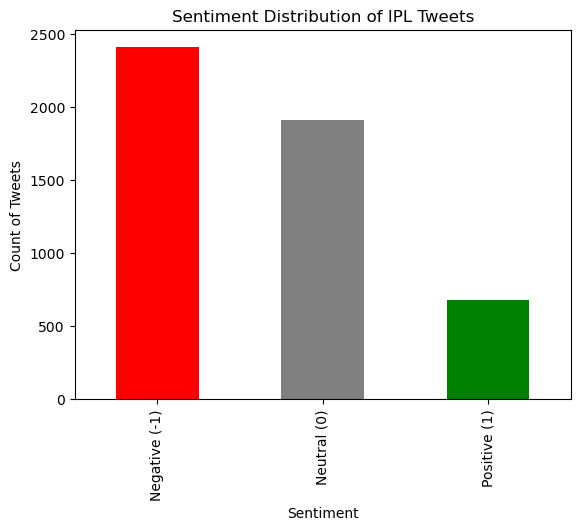

In [17]:
import pandas as pd

# Load the auto-labeled dataset
file_path = "IPL_Tweets_AutoLabeled.csv"  # Update if needed
df_labeled = pd.read_csv(file_path)

# Display first 5 rows
print("✅ First 5 tweets in the dataset:")
print(df_labeled.head())

# Show random 10 tweets to check sentiment labeling
print("\n✅ Random sample of 10 tweets:")
print(df_labeled.sample(n=10, random_state=42))

# Display sentiment distribution
print("\n✅ Sentiment Distribution:")
print(df_labeled['Sentiment'].value_counts())

# Visualize sentiment distribution (optional)
import matplotlib.pyplot as plt

df_labeled['Sentiment'].value_counts().plot(kind='bar', color=['red', 'gray', 'green'])
plt.xticks(ticks=[0, 1, 2], labels=['Negative (-1)', 'Neutral (0)', 'Positive (1)'])
plt.xlabel("Sentiment")
plt.ylabel("Count of Tweets")
plt.title("Sentiment Distribution of IPL Tweets")
plt.show()

In [19]:
!pip install scikit-learn nltk pandas numpy

In [27]:
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download stopwords & lemmatizer if not already installed
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Load the labeled dataset
file_path = "IPL_Tweets_AutoLabeled.csv"
df = pd.read_csv(file_path)

# Text Preprocessing Function (Without `punkt`)
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = text.split()  # Simple tokenization without using `punkt`
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize words
    return " ".join(tokens)

# Apply text preprocessing
df['Processed_Tweet'] = df['Tweet'].apply(preprocess_text)

# Convert text data into numerical representation using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Processed_Tweet'])
y = df['Sentiment']  # Target labels

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy:.4f}\n")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anirudhravipudi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anirudhravipudi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



✅ Model Accuracy: 0.7320


Classification Report:
               precision    recall  f1-score   support

          -1       0.79      0.11      0.20       134
           0       0.68      0.82      0.75       379
           1       0.77      0.83      0.80       487

    accuracy                           0.73      1000
   macro avg       0.75      0.59      0.58      1000
weighted avg       0.74      0.73      0.70      1000


Confusion Matrix:
 [[ 15  66  53]
 [  1 311  67]
 [  3  78 406]]


In [30]:
print(df['Sentiment'].value_counts())

Sentiment
 1    2409
 0    1909
-1     682
Name: count, dtype: int64


In [32]:
from sklearn.utils import resample

# Separate tweets by sentiment
df_negative = df[df['Sentiment'] == -1]  # Few samples
df_neutral = df[df['Sentiment'] == 0]    # More samples
df_positive = df[df['Sentiment'] == 1]   # More samples

# Find the class with the highest count
max_samples = max(len(df_neutral), len(df_positive))

# Oversample negative tweets to match other classes
df_negative_oversampled = resample(df_negative, replace=True, n_samples=max_samples, random_state=42)

# Combine all balanced classes
df_balanced = pd.concat([df_negative_oversampled, df_neutral, df_positive])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
print("✅ New Class Distribution:\n", df_balanced['Sentiment'].value_counts())

✅ New Class Distribution:
 Sentiment
 1    2409
-1    2409
 0    1909
Name: count, dtype: int64


In [34]:
# Preprocess tweets again
df_balanced['Processed_Tweet'] = df_balanced['Tweet'].apply(preprocess_text)

# Convert text data into numerical representation using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_balanced = vectorizer.fit_transform(df_balanced['Processed_Tweet'])
y_balanced = df_balanced['Sentiment']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate new model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Balanced Model Accuracy: {accuracy:.4f}\n")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Balanced Model Accuracy: 0.8068


Classification Report:
               precision    recall  f1-score   support

          -1       0.82      0.92      0.87       478
           0       0.75      0.72      0.74       378
           1       0.83      0.76      0.79       490

    accuracy                           0.81      1346
   macro avg       0.80      0.80      0.80      1346
weighted avg       0.81      0.81      0.81      1346


Confusion Matrix:
 [[439  20  19]
 [ 47 274  57]
 [ 47  70 373]]


In [36]:
# Ensure df is being used (no file loading needed)
df_all = df  # Use the cleaned dataset in memory

# Preprocess tweets again to ensure consistency
df_all['Processed_Tweet'] = df_all['Tweet'].apply(preprocess_text)

# Convert text into numerical representation using the same TF-IDF vectorizer
X_all = vectorizer.transform(df_all['Processed_Tweet'])

# Predict sentiment using the trained model
df_all['Predicted_Sentiment'] = model.predict(X_all)

# Show sentiment distribution
print("✅ Sentiment Distribution in Full Dataset:\n", df_all['Predicted_Sentiment'].value_counts())

# Display sample predictions
print("\n✅ Sample Predicted Tweets:")
print(df_all[['Tweet', 'Predicted_Sentiment']].sample(10, random_state=42))

✅ Sentiment Distribution in Full Dataset:
 Predicted_Sentiment
 1    2299
 0    1861
-1     840
Name: count, dtype: int64

✅ Sample Predicted Tweets:
                                                  Tweet  Predicted_Sentiment
1501  With #CSK out of #IPL2020 although it still ha...                    1
2586  #IPL2020 #RCBvSRH \n2020 end hone ko hai aur d...                    0
2653  Unpopular opinion: @rajasthanroyals  is the ON...                    1
1055  Good season @DelhiCapitals . . . Congrats @mip...                    1
705   @cricbuzz get us team list at the earliest pos...                    0
106   Thank u #mithunsir #IamManishTanwar\nFelt grea...                    1
589   De Villiers excels as RCB survive Pollard scar...                    1
2468  #IPL2020 #MumbaiIndians \n\n@Jaspritbumrah93\n...                    0
2413  Milestone Alert - 300th T20 match for @Eoin16\...                    1
1600  Gayle had only been closer to the middle of hi...                    0


In [38]:
# Save the training dataset used for model training
df_balanced.to_csv("IPL_Tweets_Training.csv", index=False)

print("✅ Training dataset saved as 'IPL_Tweets_Training.csv'")

✅ Training dataset saved as 'IPL_Tweets_Training.csv'


In [40]:
import pandas as pd
import ast

# Load the raw dataset from the given file path
file_path = "/Users/anirudhravipudi/Desktop/Project (IPL)/IPL2020_Tweets.csv"
df = pd.read_csv(file_path)

# 🔸 1. Drop Unnecessary Columns
df.drop(columns=['user_location', 'user_verified', 'source', 'user_favourites', 'user_description', 'user_created'], inplace=True)

# 🔸 2. Rename Columns for Better Understanding
df.rename(columns={
    'user_name': 'User Name',
    'user_followers': 'Followers',
    'user_friends': 'Following',
    'text': 'Tweet',
    'hashtags': 'Hashtags',
    'date': 'Date',
    'is_retweet': 'Is Retweet',
    'month': 'Month',
    'year': 'Year'
}, inplace=True)

# 🔸 3. Handle Missing Values
df.dropna(subset=['Tweet'], inplace=True)  # Remove rows where Tweet is missing
df['Hashtags'] = df['Hashtags'].fillna("[]")  # Fill missing hashtags with an empty list

# 🔸 4. Convert Data Types
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime format
df['Is Retweet'] = df['Is Retweet'].astype(str).str.lower().map({'true': True, 'false': False})  # Convert to boolean

# 🔸 5. Remove Duplicate Tweets
df.drop_duplicates(subset=['Tweet'], inplace=True)

# 🔸 6. Convert Hashtags Column to List
df['Hashtags'] = df['Hashtags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# 🔸 7. (Optional) Filter Only English Tweets
# If you want to filter only English tweets, uncomment the line below:
# df = df[df['Tweet'].apply(lambda x: x.isascii())]

# 🔸 8. Save the Cleaned Dataset
cleaned_file_path = "/Users/anirudhravipudi/Desktop/Project (IPL)/IPL2020_Tweets_Cleaned.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"✅ Data cleaning complete! Cleaned dataset saved as '{cleaned_file_path}'")

/var/folders/3z/j19155j53837tjkhyx5r2rt80000gn/T/ipykernel_70811/3617303736.py:6: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


✅ Data cleaning complete! Cleaned dataset saved as '/Users/anirudhravipudi/Desktop/Project (IPL)/IPL2020_Tweets_Cleaned.csv'


In [42]:
import pandas as pd

# Load the cleaned dataset
file_path = "/Users/anirudhravipudi/Desktop/Project (IPL)/IPL2020_Tweets_Cleaned.csv"
df_all = pd.read_csv(file_path)

# Preprocess tweets again to ensure consistency
df_all['Processed_Tweet'] = df_all['Tweet'].apply(preprocess_text)

# Convert text into numerical representation using the trained TF-IDF vectorizer
X_all = vectorizer.transform(df_all['Processed_Tweet'])

# Predict sentiment using the trained model
df_all['Predicted_Sentiment'] = model.predict(X_all)

# Show sentiment distribution
print("✅ Sentiment Distribution in Full Dataset:\n", df_all['Predicted_Sentiment'].value_counts())

# Display sample predictions
print("\n✅ Sample Predicted Tweets:")
print(df_all[['Tweet', 'Predicted_Sentiment']].sample(10, random_state=42))

/var/folders/3z/j19155j53837tjkhyx5r2rt80000gn/T/ipykernel_70811/3476288575.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv(file_path)


✅ Sentiment Distribution in Full Dataset:
 Predicted_Sentiment
 1    251474
 0    220416
-1     97383
Name: count, dtype: int64

✅ Sample Predicted Tweets:
                                                    Tweet  Predicted_Sentiment
362972  Final score predictions??👀👀\n\n#8YearsForREBEL...                    0
107961  FIFTY PARTNERSHIP! Ishan Kishan (35 off 20) ha...                    0
26727   What a match !!! The way #kanewilliamson &amp;...                    1
560224  #ArrestSSRKillers\nwhy #IPL2020 in UAE ???\nBo...                   -1
545811  @IPL 2020 now just 16 Days Left then the Fun i...                    0
437410  A great test knock by @msdhoni \nKeep going\n#...                    1
135977  LIVE | Gayle, Mayank Fall in Quick Succession....                   -1
66880                        Goodbye KKR and SRK #IPL2020                    0
324607  This!❤️🤗 #IPl2020 #RCBvMI https://t.co/l2yVYzQL8E                    0
85422   In today's @IPL match, @DelhiCapitals take on 

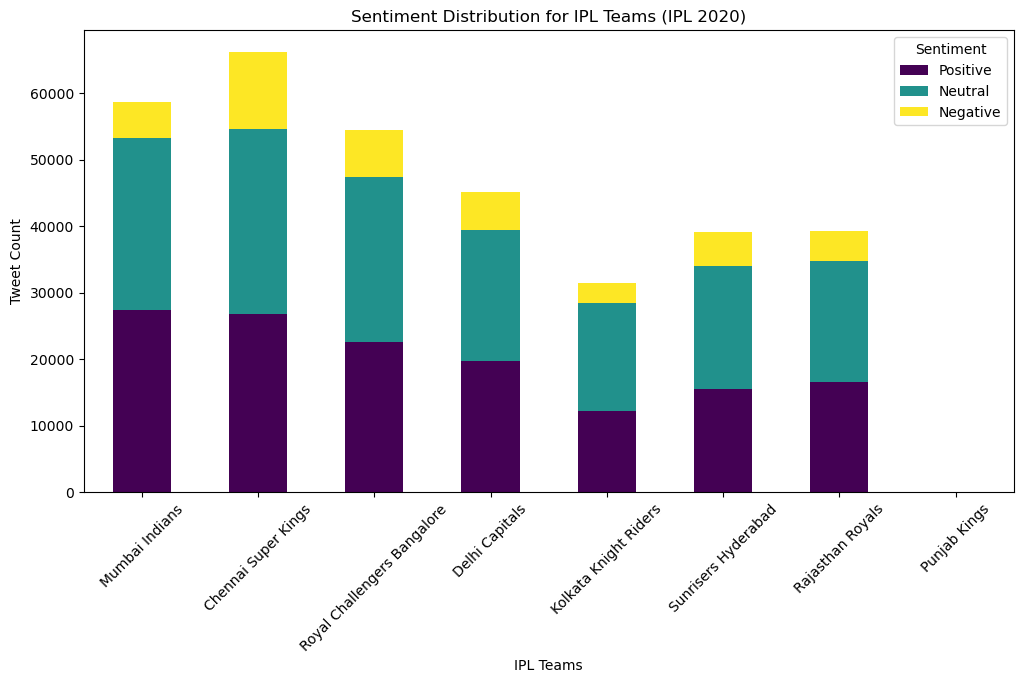

In [47]:
import matplotlib.pyplot as plt

# Define IPL Team Hashtags
ipl_teams = {
    'Mumbai Indians': ['#MI', '#MumbaiIndians'],
    'Chennai Super Kings': ['#CSK', '#ChennaiSuperKings'],
    'Royal Challengers Bangalore': ['#RCB', '#RoyalChallengersBangalore'],
    'Delhi Capitals': ['#DC', '#DelhiCapitals'],
    'Kolkata Knight Riders': ['#KKR', '#KolkataKnightRiders'],
    'Sunrisers Hyderabad': ['#SRH', '#SunrisersHyderabad'],
    'Rajasthan Royals': ['#RR', '#RajasthanRoyals'],
    'Punjab Kings': ['#PBKS', '#PunjabKings'],
}

# Initialize dictionary to store sentiment counts for each team
team_sentiment = {}

# Loop through teams and filter tweets
for team, hashtags in ipl_teams.items():
    df_team = df_all[df_all['Tweet'].str.contains('|'.join(hashtags), case=False, na=False)]
    sentiment_counts = df_team['Predicted_Sentiment'].value_counts().to_dict()
    team_sentiment[team] = {
        'Positive': sentiment_counts.get(1, 0),
        'Neutral': sentiment_counts.get(0, 0),
        'Negative': sentiment_counts.get(-1, 0),
    }

# Convert to DataFrame
df_team_sentiment = pd.DataFrame.from_dict(team_sentiment, orient='index')

# Plot Team-wise Sentiment Distribution
df_team_sentiment.plot(kind='bar', figsize=(12, 6), stacked=True, colormap='viridis')
plt.xlabel("IPL Teams")
plt.ylabel("Tweet Count")
plt.title("Sentiment Distribution for IPL Teams (IPL 2020)")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.show()

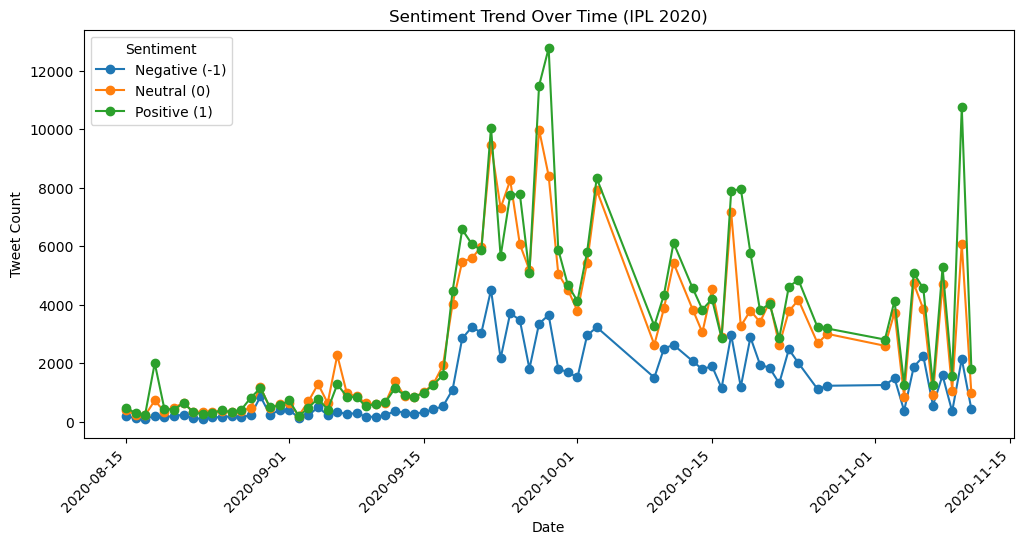

In [49]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format if not already
df_all['Date'] = pd.to_datetime(df_all['Date'])

# Group by Date and Sentiment to get daily sentiment counts
daily_sentiment = df_all.groupby(['Date', 'Predicted_Sentiment']).size().unstack()

# Plot sentiment trend over time
daily_sentiment.plot(kind='line', figsize=(12, 6), marker='o')
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.title("Sentiment Trend Over Time (IPL 2020)")
plt.legend(["Negative (-1)", "Neutral (0)", "Positive (1)"], title="Sentiment")
plt.xticks(rotation=45)
plt.show()

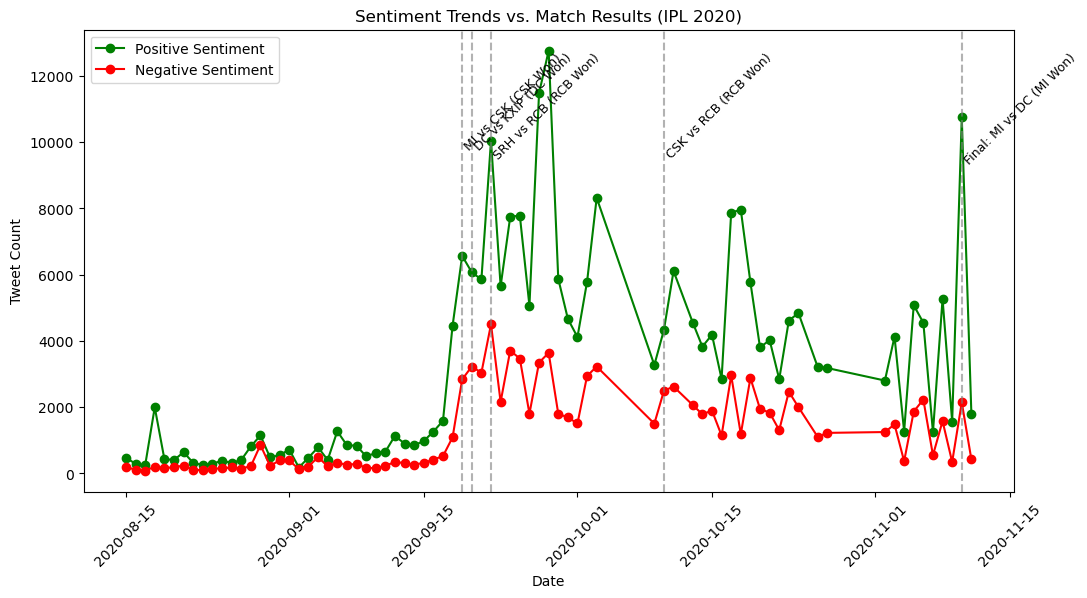

In [51]:
# Sample IPL 2020 match results data (Replace with actual match dates)
match_results = {
    '2020-09-19': 'MI vs CSK (CSK Won)',
    '2020-09-20': 'DC vs KXIP (DC Won)',
    '2020-09-22': 'SRH vs RCB (RCB Won)',
    '2020-10-10': 'CSK vs RCB (RCB Won)',
    '2020-11-10': 'Final: MI vs DC (MI Won)'
}

# Re-plot sentiment trends with match results
plt.figure(figsize=(12, 6))
plt.plot(daily_sentiment.index, daily_sentiment[1], label="Positive Sentiment", color='green', marker='o')
plt.plot(daily_sentiment.index, daily_sentiment[-1], label="Negative Sentiment", color='red', marker='o')

# Annotate match results on the graph
for match_date, match in match_results.items():
    plt.axvline(pd.to_datetime(match_date), color='gray', linestyle='--', alpha=0.6)
    plt.text(pd.to_datetime(match_date), max(daily_sentiment[1]), match, rotation=45, fontsize=9, verticalalignment='top')

plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.title("Sentiment Trends vs. Match Results (IPL 2020)")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [53]:
# Extract top 5 most positive tweets
top_positive = df_all[df_all['Predicted_Sentiment'] == 1].sample(5, random_state=42)

# Extract top 5 most negative tweets
top_negative = df_all[df_all['Predicted_Sentiment'] == -1].sample(5, random_state=42)

print("\n✅ Top Positive Tweets:")
print(top_positive[['Date', 'Tweet']])

print("\n❌ Top Negative Tweets:")
print(top_negative[['Date', 'Tweet']])


✅ Top Positive Tweets:
             Date                                              Tweet
59817  2020-11-05  What do you think would make @RickyPonting lau...
245112 2020-10-10  Back In Action 🤩 #djlife #afterlongholidays #g...
40958  2020-11-06  Feeling very sad on #rcb exit\n#RCBvSRH\nHopef...
459895 2020-09-21  RCB Win their 1st match of ipl  2020. y chahal...
396450 2020-09-25  M7: #CSKvsDC #IPL2020 \nWho wins today?\n@King...

❌ Top Negative Tweets:
             Date                                              Tweet
252029 2020-10-09  @ESPNcricinfo I predict a breakout Steve Smith...
207068 2020-10-14  Magnificent shot by Carey off Archer. Fast, di...
43693  2020-11-06  When life gives you K make it Kane not Kohli😂\...
521652 2020-09-15  @ChennaiIPL @KKRiders @SunRisers @DelhiCapital...
23014  2020-11-09  When Ziva was born 5 years ago, MSD was in Aus...


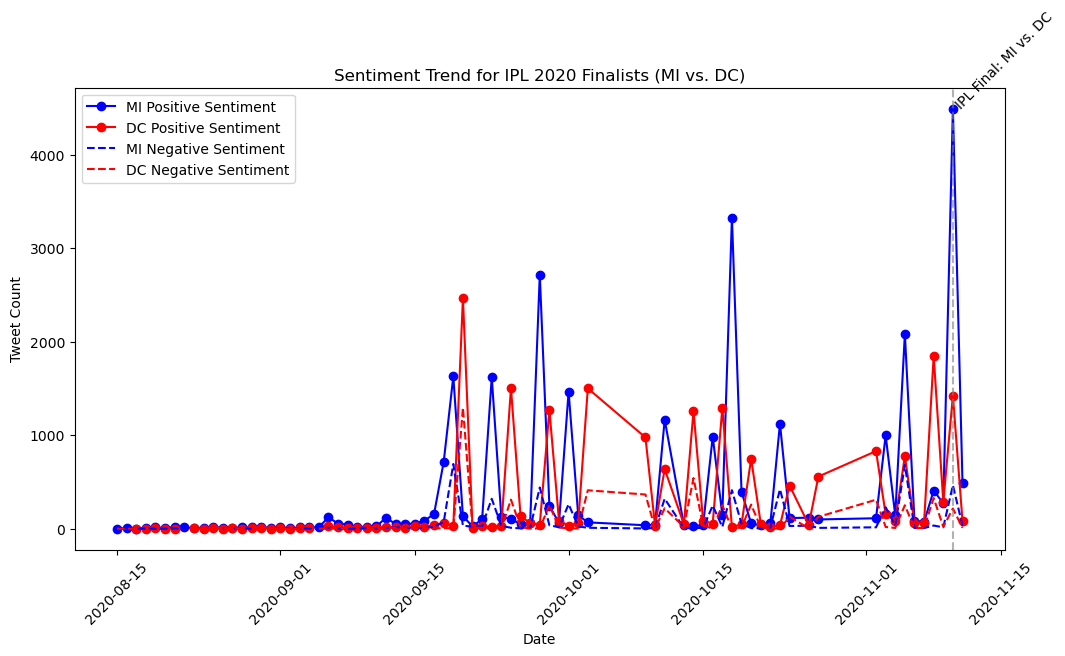

In [55]:
# Filter tweets for Mumbai Indians and Delhi Capitals
mi_tweets = df_all[df_all['Tweet'].str.contains('#MI|#MumbaiIndians', case=False, na=False)]
dc_tweets = df_all[df_all['Tweet'].str.contains('#DC|#DelhiCapitals', case=False, na=False)]

# Group by Date and Sentiment for both teams
mi_sentiment_trend = mi_tweets.groupby(['Date', 'Predicted_Sentiment']).size().unstack()
dc_sentiment_trend = dc_tweets.groupby(['Date', 'Predicted_Sentiment']).size().unstack()

# Plot Sentiment Trends for MI vs. DC
plt.figure(figsize=(12, 6))
plt.plot(mi_sentiment_trend.index, mi_sentiment_trend[1], label="MI Positive Sentiment", color='blue', marker='o')
plt.plot(dc_sentiment_trend.index, dc_sentiment_trend[1], label="DC Positive Sentiment", color='red', marker='o')
plt.plot(mi_sentiment_trend.index, mi_sentiment_trend[-1], label="MI Negative Sentiment", color='blue', linestyle='dashed')
plt.plot(dc_sentiment_trend.index, dc_sentiment_trend[-1], label="DC Negative Sentiment", color='red', linestyle='dashed')

# Highlight the final match date
final_match_date = "2020-11-10"
plt.axvline(pd.to_datetime(final_match_date), color='gray', linestyle='--', alpha=0.6)
plt.text(pd.to_datetime(final_match_date), max(mi_sentiment_trend[1]), "IPL Final: MI vs. DC", rotation=45, fontsize=10)

plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.title("Sentiment Trend for IPL 2020 Finalists (MI vs. DC)")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [57]:
# Define last 3 days before the final
final_days = ["2020-11-07", "2020-11-08", "2020-11-09"]

# Filter tweets for the final days
mi_final_sentiment = mi_tweets[mi_tweets['Date'].astype(str).isin(final_days)]['Predicted_Sentiment'].value_counts()
dc_final_sentiment = dc_tweets[dc_tweets['Date'].astype(str).isin(final_days)]['Predicted_Sentiment'].value_counts()

# Print sentiment distribution before final
print("✅ Sentiment Distribution for MI (Last 3 Days Before Final):\n", mi_final_sentiment)
print("\n✅ Sentiment Distribution for DC (Last 3 Days Before Final):\n", dc_final_sentiment)

✅ Sentiment Distribution for MI (Last 3 Days Before Final):
 Predicted_Sentiment
 1    755
 0    558
-1     59
Name: count, dtype: int64

✅ Sentiment Distribution for DC (Last 3 Days Before Final):
 Predicted_Sentiment
 0    2381
 1    2204
-1     360
Name: count, dtype: int64


In [59]:
# Compare positive sentiment
mi_positive = mi_final_sentiment.get(1, 0)
dc_positive = dc_final_sentiment.get(1, 0)

# Compare negative sentiment
mi_negative = mi_final_sentiment.get(-1, 0)
dc_negative = dc_final_sentiment.get(-1, 0)

# Determine predicted winner
predicted_winner = "Mumbai Indians (MI)" if mi_positive > dc_positive else "Delhi Capitals (DC)"

# Print results
print(f"🏆 **Predicted IPL 2020 Winner based on Sentiment: {predicted_winner}** 🏏")
print(f"🔹 MI Positive Sentiment: {mi_positive}, Negative Sentiment: {mi_negative}")
print(f"🔹 DC Positive Sentiment: {dc_positive}, Negative Sentiment: {dc_negative}")

🏆 **Predicted IPL 2020 Winner based on Sentiment: Delhi Capitals (DC)** 🏏
🔹 MI Positive Sentiment: 755, Negative Sentiment: 59
🔹 DC Positive Sentiment: 2204, Negative Sentiment: 360


In [63]:
import pandas as pd

# Load the cleaned dataset
file_path = "/Users/anirudhravipudi/Desktop/Project (IPL)/IPL2020_Tweets_Cleaned.csv"
df_cleaned = pd.read_csv(file_path)

# Display the first few rows
print(df_cleaned.head(5))

              User Name  Followers  Following        Date  \
0    GAURAV DHANAWAT 🇮🇳      147.0      127.0  2020-11-11   
1  🇮🇳🇮🇳 शुभम दोहरे 🇮🇳🇮🇳      113.0      699.0  2020-11-11   
2         Steven Gordon       27.0       57.0  2020-11-11   
3         Bhumish Patel      131.0     1525.0  2020-11-11   
4        cricket22yards      551.0      189.0  2020-11-11   

                                               Tweet  \
0  Time to change the Bubble from #IPL2020 to #IS...   
1  Why is #2020Fixing trending?? \n\nI think rcb ...   
2  @ICC And still #rajasthanroyals  finished last...   
3  I still remember the bus parade after @mipalta...   
4  #IPL2020 \n\nSTATS: Most runs, fastest fifties...   

                                            Hashtags Is Retweet  Month    Year  
0                             ['IPL2020', 'ISL2020']      False   11.0  2020.0  
1                                     ['2020Fixing']      False   11.0  2020.0  
2  ['rajasthanroyals', 'JofraArcher', 'RR', 'jofr... 

/var/folders/3z/j19155j53837tjkhyx5r2rt80000gn/T/ipykernel_70811/2895180333.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned = pd.read_csv(file_path)


In [ ]:
import pandas as pd

file_path = 

